In [1]:
import numpy as np
from config import config
from typing import Any

class SleepCurve:
    def __init__(self) -> None:
        _w = config.wake_time
        if _w <= config.sleep_time:
            _w += config.one_day
        sfs_len = _w - config.sleep_time
        wfs_len = config.one_day - sfs_len
        self.wake_switch = (config.sleep_time + sfs_len/2)%config.one_day
        self.sleep_switch = (config.wake_time + wfs_len/2)%config.one_day
        
        _s = config.sleep_time
        if _s <= self.sleep_switch:
            _s += config.one_day
        _hb = _s - config.before_sleep/2
        T,M = np.log(1/config.threshold - 1),np.log(1/config.My - 1)
        self.sleep_k = (T - M) / (_s - _hb)
        self.sleep_b = T - self.sleep_k * _s

        _w = config.wake_time
        if _w <= self.wake_switch:
            _w += config.one_day
        _hb = _w + config.after_wake/2
        self.wake_k = (T-M)/(_w - _hb)
        self.wake_b = T - self.wake_k * _w

    def sleep_sigmoid(self,x:float) -> float:
        if self.sleep_switch > x:
            x += config.one_day
        v = 1/(1 + np.exp(self.sleep_k * x + self.sleep_b))
        return v
    
    def wake_sigmoid(self,x:float) -> float:

        if self.wake_switch > x:
            x += config.one_day
        v = 1 / (1+np.exp(self.wake_k*x+ self.wake_b))
        return v
    
    def function(self,x:float) -> float:
        x = x % config.one_day
        if x < self.wake_switch or x >= self.sleep_switch:
            v = self.sleep_sigmoid(x)
        else:
            v = self.wake_sigmoid(x)
        return v

    def __call__(self, *args: Any, **kwds: Any) -> Any:
        return self.function(*args,**kwds)

In [2]:
import matplotlib.pyplot as plt
SC = SleepCurve()

ModuleNotFoundError: No module named 'matplotlib'

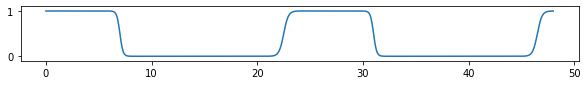

In [4]:
%matplotlib inline
plt.figure(figsize=(10,1))
g = plt.subplot()
idx = np.linspace(0,config.one_day*2,1000)
y = [SC(i) for i in idx]
g.plot(idx,y)
g.set_ylim([-0.1,1.1])
#g.set_aspect('equal')
plt.show()